# Yahoo Finance Dataset Analysis

In [1]:
# !pip install dtw-python

In [2]:
# Here we have useful import
from sklearn.preprocessing import StandardScaler
from dtw import *
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn')
# plt.rc("figure", figsize=(10,10))  # size of the figure
# to quickly get access to a list of the tickers in different indices

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Set constant variable

In [3]:
DIR_DATA = "../dataset/yahoo_finance_dataset/"
TICKERS = ["AAPL", "KO", "VOW3.DE"]
NORMALIZE = True

## Functions

In [4]:
# Load the datasets
def get_dataframe(ticker):
    FORMAT_FILE = "{}.csv"
    df = pd.read_csv(DIR_DATA + FORMAT_FILE.format(ticker))
    # fill eventual NaN values
    df = df.fillna(method = 'ffill').fillna(method = 'bfill')
    return df

### DTW

In [5]:
# DTW
def compute_dtw(data, col1="volume", col2="log_returns"):
    x = data[col1]
    y = data[col2]

    if NORMALIZE:
        scaler = StandardScaler()
        reshape = x.values.reshape(-1, 1)
        x = scaler.fit_transform(reshape)
        reshape = y.values.reshape(-1, 1)
        y = scaler.fit_transform(reshape)
    
    # DTW Parameters: see https://dynamictimewarping.github.io/py-api/html/api/dtw.dtw.html#dtw.dtw
    
    plt.rc("figure", figsize=(10,10))  # size of the figure
    dtw(x, y, keep_internals=True).plot(type="threeway", xlab=col1, ylab=col2)

    plt.rc("figure", figsize=(30,8))  # size of the figure
    dtw(x, y, keep_internals=True, 
        step_pattern=rabinerJuangStepPattern(ptype=4, slope_weighting="d"))\
        .plot(type="twoway", offset=-9).legend((col1, col2), loc="upper left")

### Volatility

Sources:
- [Calculate the Volatility of Historic Stock Prices with Pandas and Python](https://www.learnpythonwithrune.org/calculate-the-volatility-of-historic-stock-prices-with-pandas-and-python/)
- [Volatility](https://corporatefinanceinstitute.com/resources/capital-markets/volatility-vol/)

Volatility is a measure of the rate of fluctuations in the price of a security over time. It indicates the level of risk associated with the price changes of a security. Investors and traders calculate the volatility of a security to assess past variations in the prices to predict their future movements.

We create a new column called 'Log returns' with the daily log return of the Close price.
We use log returns instead of daily simple return, since the log returns have the advantage that you can add them together, while this is not the case for simple returns. Therefore the log returns are used in most financial analysis.
We need **standard deviation** for the volatility of the stock

The volatility is defined as the annualized standard deviation

In [6]:
def compute_volatility(df):
     # Compute the daily log return
    df['Log_returns'] = np.log(df['Close']/df['Close'].shift())
    # Compute standard deviation
    df['Log_returns'].std()
    # Fill the missing values
    df['Log_returns'] = df['Log_returns'].fillna(method="bfill")
    # Compute volatility
    volatility = df['Log_returns'].std()*252**.5 # we have 252 trading days per year
    # Plot volatility
    str_vol = str(round(volatility, 4)*100)

    fig, ax = plt.subplots()
    df['Log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
    ax.set_xlabel("Log return")
    ax.set_ylabel("Freq of log return")
    ax.set_title("AAPL volatility: " + str_vol + "%")

In [7]:
def see_ticker_stat(ticker):
    df = get_dataframe(ticker)
    compute_volatility(df)
    compute_dtw(df, "Volume", "Log_returns")

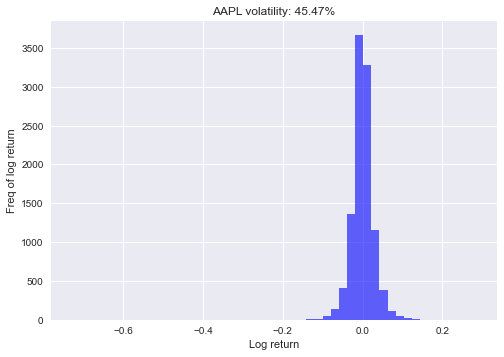

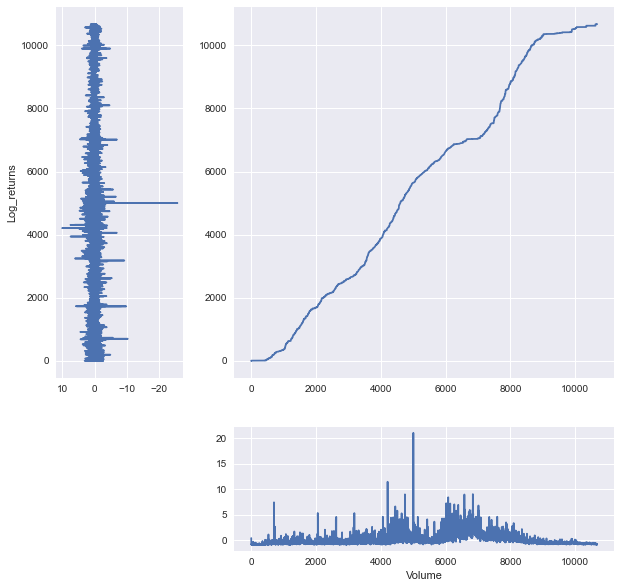

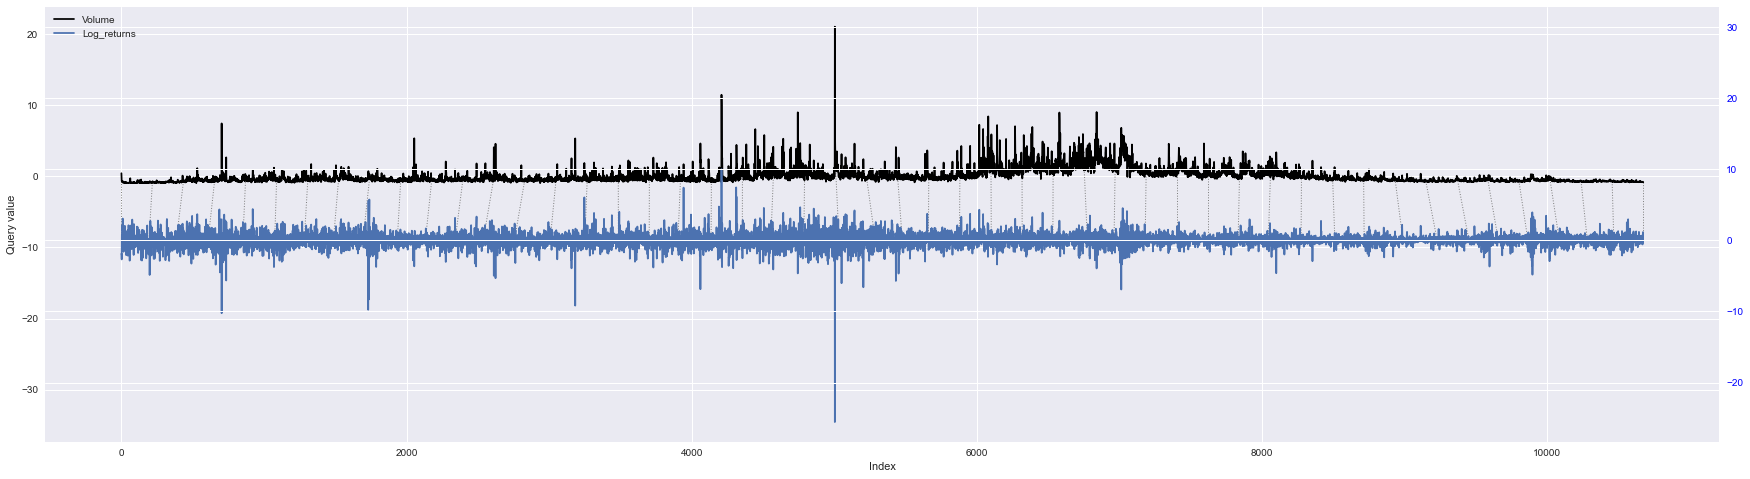

In [8]:
# AAPL
see_ticker_stat(TICKERS[0])

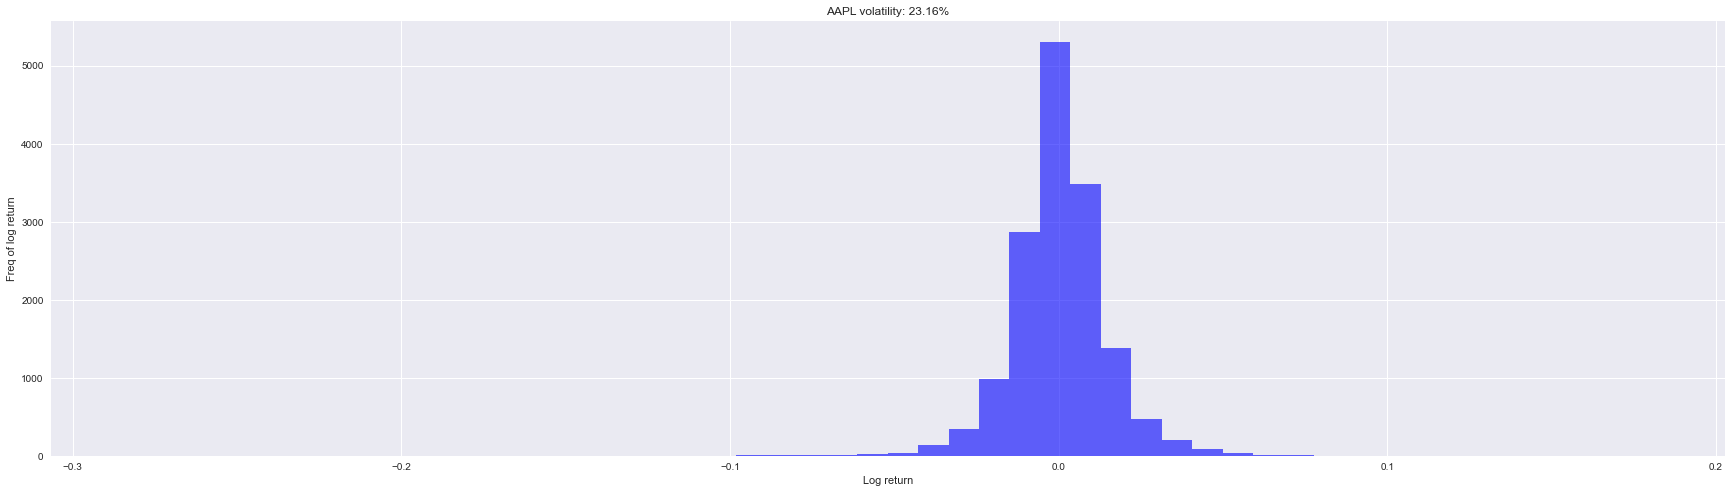

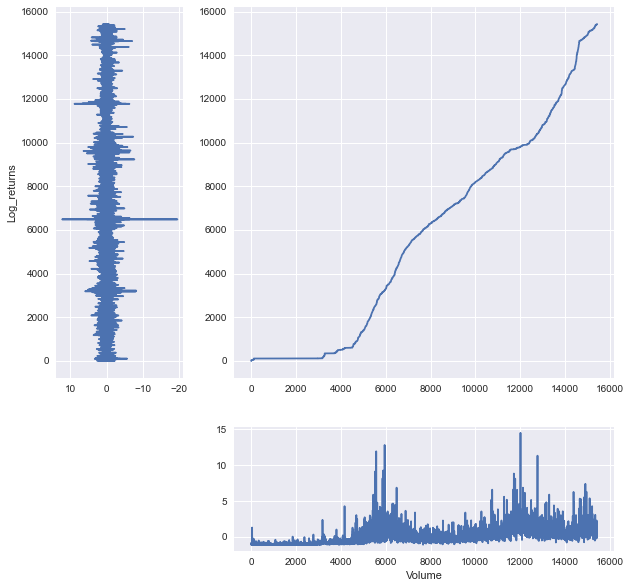

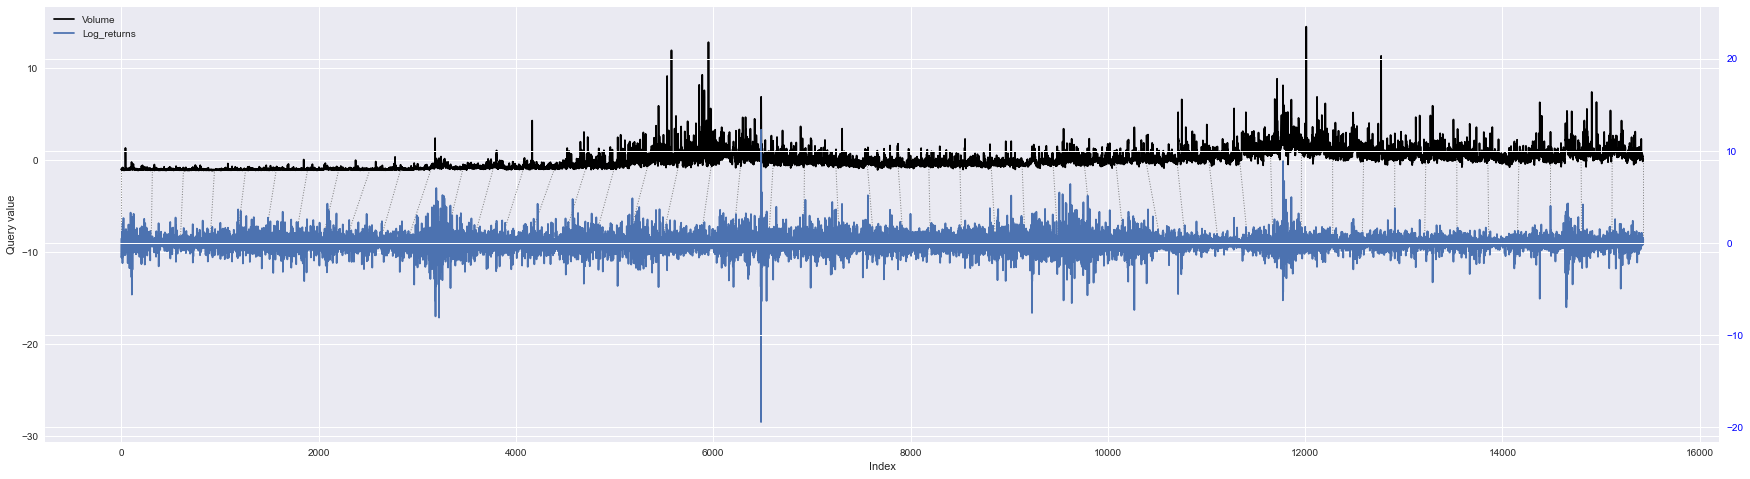

In [9]:
# COCA_COLA
see_ticker_stat(TICKERS[1])

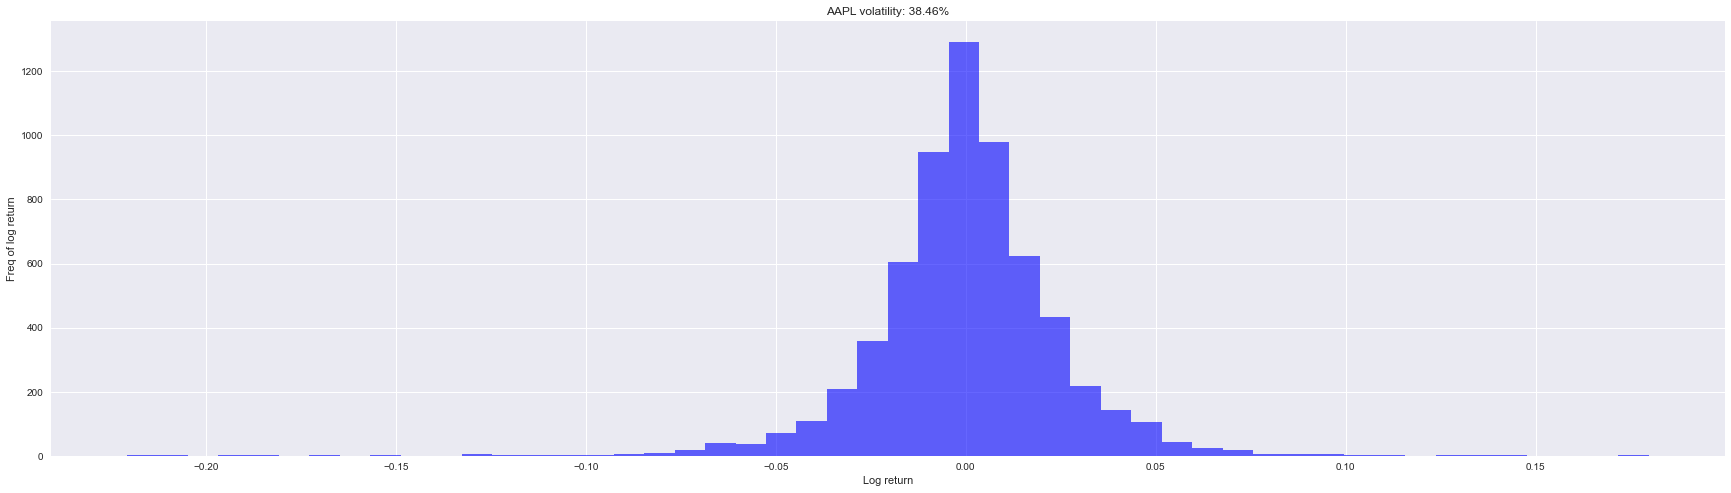

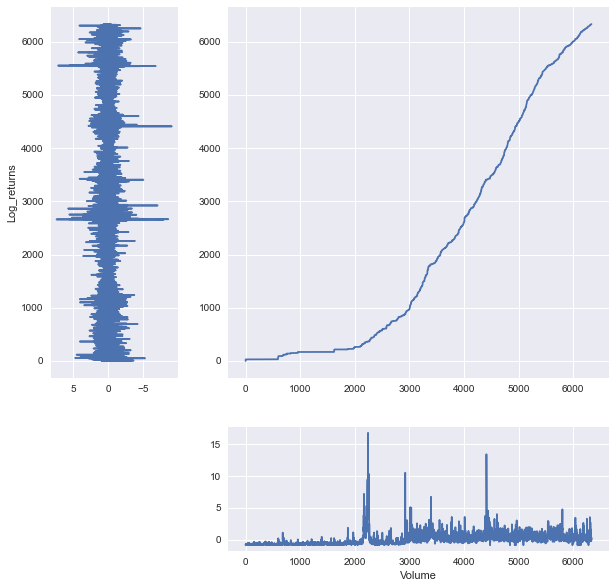

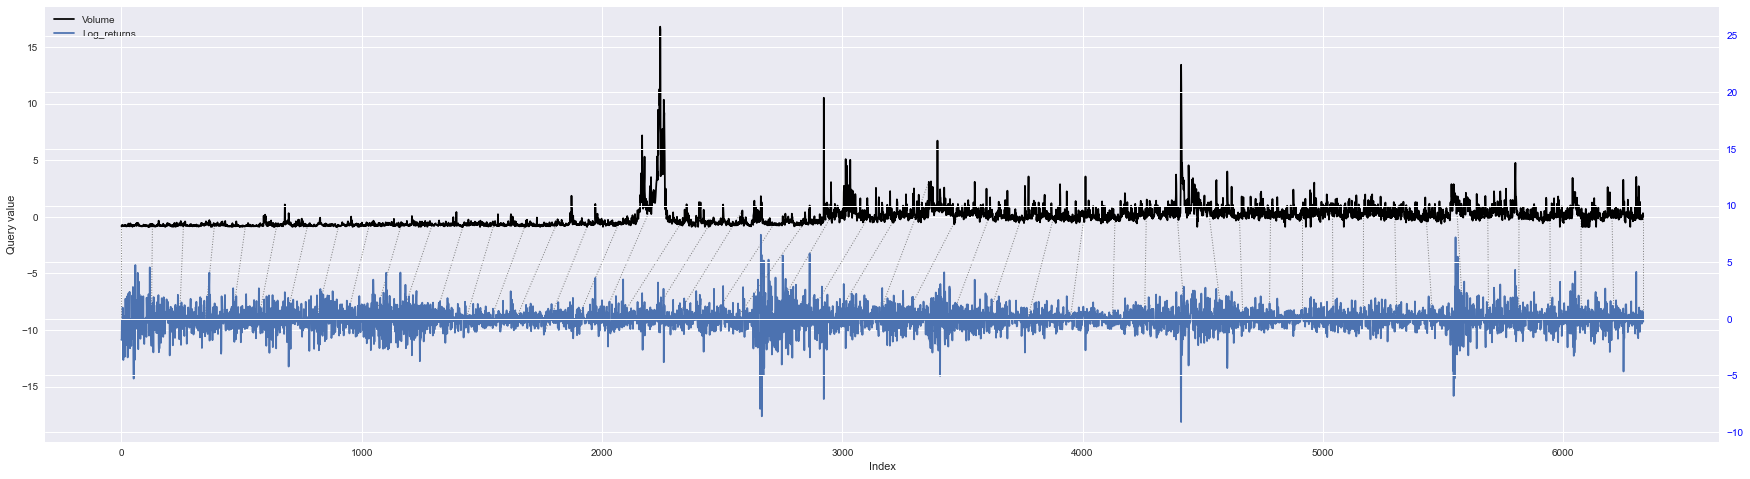

In [10]:

see_ticker_stat(TICKERS[2])